#1 - no data 

#2 Use filter() to find what days corresponded to the peak closing price for each of the four stocks in gafa_stock.

In [3]:
import pandas as pd

data_bricks = pd.read_csv(r"../data-raw/tute1.csv")
data_bricks.head(10)

,Quarter,Sales,AdBudget,GDP
0,1981-03-01,1020.2,659.2,251.8
1,1981-06-01,889.2,589.0,290.9
2,1981-09-01,795.0,512.5,290.8
3,1981-12-01,1003.9,614.1,292.4
4,1982-03-01,1057.7,647.2,279.1
5,1982-06-01,944.4,602.0,254.0
6,1982-09-01,778.5,530.7,295.6
7,1982-12-01,932.5,608.4,271.7
8,1983-03-01,996.5,637.9,259.6
9,1983-06-01,907.7,582.4,280.5


In [10]:
data_bricks['date'] = pd.to_datetime(data_bricks['Quarter'], format='%Y-%m-%d').drop(columns="Quarter", inplace=True)

<Axes: xlabel='date'>

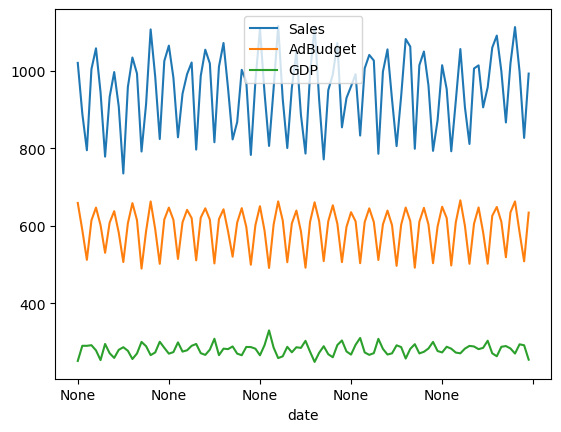

In [11]:
data_bricks.plot(kind='line', x='date', )

In [24]:
data_tourism = pd.read_csv(r"../data-raw/tourism.csv", index_col='Quarter')
data_tourism.head(10)

,Region,State,Purpose,Trips
Quarter,,,,
1998-01-01,Adelaide,South Australia,Business,135.077690
1998-04-01,Adelaide,South Australia,Business,109.987316
1998-07-01,Adelaide,South Australia,Business,166.034687
1998-10-01,Adelaide,South Australia,Business,127.160464
1999-01-01,Adelaide,South Australia,Business,137.448533
1999-04-01,Adelaide,South Australia,Business,199.912586
1999-07-01,Adelaide,South Australia,Business,169.355090
1999-10-01,Adelaide,South Australia,Business,134.357937
2000-01-01,Adelaide,South Australia,Business,154.034398


In [47]:
data_tourism['State'].unique()

array(['South Australia', 'Northern Territory', 'Western Australia',
       'Victoria', 'New South Wales', 'Queensland', 'ACT', 'Tasmania'],
      dtype=object)

In [49]:
test = data_tourism[data_tourism['State'].isin(['South Australia', 'Northern Territory', 'Western Australia'])]
test

,Region,State,Purpose,Trips
Quarter,,,,
1998-01-01,Adelaide,South Australia,Business,135.077690
1998-04-01,Adelaide,South Australia,Business,109.987316
1998-07-01,Adelaide,South Australia,Business,166.034687
1998-10-01,Adelaide,South Australia,Business,127.160464
1999-01-01,Adelaide,South Australia,Business,137.448533
...,...,...,...,...
2016-10-01,Yorke Peninsula,South Australia,Visiting,33.672151
2017-01-01,Yorke Peninsula,South Australia,Visiting,46.223014
2017-04-01,Yorke Peninsula,South Australia,Visiting,50.582837


In [61]:
grouped = data_tourism.groupby(['Region', 'Purpose'])['Trips'].mean().sort_values(ascending=False)
grouped.head(10)

Region           Purpose 
Sydney           Visiting    747.269968
Melbourne        Visiting    618.897541
Sydney           Business    602.043884
North Coast NSW  Holiday     587.896632
Sydney           Holiday     550.326865
Gold Coast       Holiday     528.339881
Melbourne        Holiday     507.282271
South Coast      Holiday     495.058858
Brisbane         Visiting    492.806132
Melbourne        Business    477.978182
Name: Trips, dtype: float64